In [1]:
numbers = [1, -2, 3, 0, -3, 2]
positive_numbers = []
for i in numbers:
    if i > 0:
        positive_numbers.append(i)
    elif i == 0:
        break
positive_numbers

[1, 3]

In [2]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
path_to_file = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-ale-frolov/Lesson 3/3_taxi_peru.csv'
taxi = pd.read_csv(path_to_file, parse_dates = ['start_at', 'end_at', 'arrived_at'], sep = ';')
taxi = taxi.query('start_type == "reserved" or start_type == "asap"')
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [3]:
# Создайте колонку wait_time, в которой будет храниться разница между временем
# подачи машины (arrived_at) и временем заказа (start_at) в минутах.

taxi['wait_time'] = (taxi.arrived_at - taxi.start_at).astype('timedelta64[m]')
taxi

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,18.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23106,4a18ea5737ce0ffecaf20b305a0e2c86,8998bb370b5f0cec43a373adebba0c72,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,reserved,2010-07-31 13:15:00,"-12,08974075","-77,04699707",2010-07-31 13:27:00,"-12,08352661","-77,05044556",drop off,"-12,08973527","-77,04787016",2010-07-31 13:15:00,iPhone,5.0,5.0,0.0
23107,f1e4317f2c17991dd90d1cd17ae0d399,5f8a6ffef0ea5df78a8ee890267b60ec,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,asap,2010-10-02 05:26:00,"-12,09253011","-77,02875271",2010-10-02 05:56:00,"-12,07776001","-77,05623798",drop off,"-12,10639693","-77,04028948",2010-10-02 05:39:00,Android,NaN,5.0,13.0
23108,1e44c0fd0a266c3719ff30410b257bce,c0ffb6f6cd801004dd8609c12277c2d1,4851ee4c867c9b49b909c1adb76c31e9,4851ee4c867c9b49b909c1adb76c538e,executive,asap,2010-09-21 09:56:00,"-12,1275637","-77,02642288",2010-09-21 10:18:00,"-12,10529838","-77,04735249",drop off,"-12,12605017","-77,01882491",2010-09-21 10:05:00,Android,0.0,0.0,9.0
23109,7073883383b89ad289e864022150cdd7,c0ffb6f6cd801004dd8609c12277c2d1,56f59b58bcbbd1cdabc3652e713134c2,924d4f0e7554566623e8ebb3904a7b0c,executive,reserved,2010-04-29 04:30:00,"-12,019468","-77,1077669",2010-04-29 05:11:00,"-12,09909987","-77,03475013",drop off,"-12,0710933","-77,09855131",2010-04-29 04:23:00,Android,NaN,5.0,-7.0


In [4]:
# Посмотрим, какие водители опаздывали на заказы к определенному времени (start_type == 'reserved').
# Опозданием считается время ожидания wait_time > 0.0.
# Сгруппируйте отфильтрованные данные по driver_id и в качестве ответа укажите id водителя,
# который опоздал на заказ интересующего нас типа наибольшее число раз

taxi.query('start_type == "reserved" & wait_time > 0.0') \
    .groupby(['driver_id']) \
    .agg({'wait_time': 'count'}) \
    .idxmax()

wait_time    406921adcca37705ef527b4246c0cfea
dtype: object

In [13]:
# Добавьте столбец month, где будет храниться номер месяца, в котором был сделан заказ (start_at),
# и столбец weekday – название дня недели.

taxi['month'] = taxi.start_at.dt.strftime('%m')
taxi['weekday'] = taxi.start_at.dt.strftime('%A')
taxi = taxi.astype({'month': 'int64'})
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time,month,weekday
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,...,drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,18.0,11,Tuesday
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,6,Tuesday
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,5,Monday
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,6,Tuesday
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,...,drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,-5.0,9,Saturday


/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


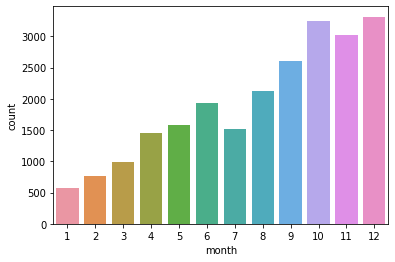

In [6]:
# Постройте график числа заказов по месяцам (month). Подумайте, с чем может быть связана полученная картина. 
# Вопрос: в каком летнем месяце было сделано наименьшее число заказов? В качестве ответа введите номер месяца (6, 7 или 8).

sns.countplot(taxi.month)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


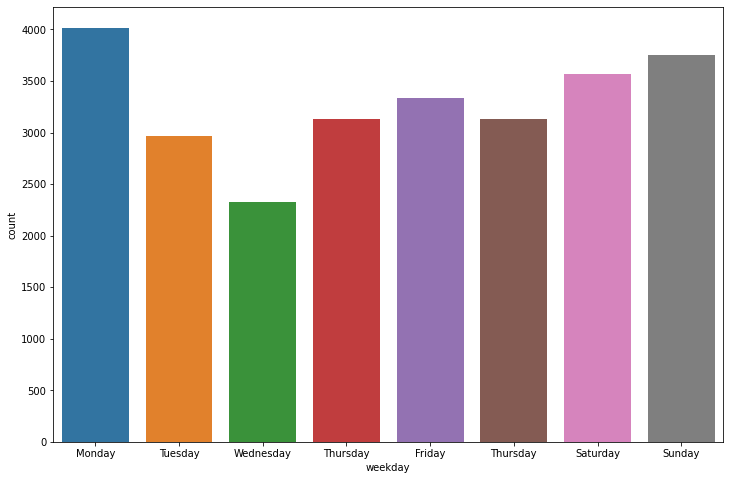

In [7]:
# А теперь – график по дням недели (weekday). Задать порядок столбиков на графике можно с помощью аргумента order,
# которому нужно передать список названий в нужном порядке. Например: 
# sns.countplot(data['column'], order=['One', 'Two', 'Three'])
# Вопрос: в какой день недели суммарно поступает меньше всего заказов? Укажите то название,которое написано в самом датафрейме.

plt.figure(figsize=(12, 8))
sns.countplot(taxi['weekday'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Thursday', 'Saturday', 'Sunday'])

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


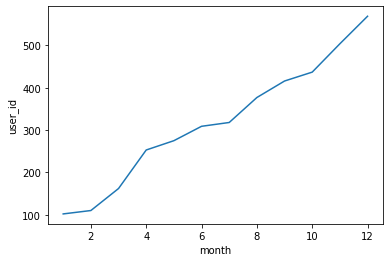

In [17]:
# Также мы можем посмотреть на несколько простых метрик, показывающих число уникальных пользователей за определённый период:
# DAU (daily active users) – число уникальных пользователей за день
# WAU (weekly active users) – число уникальных пользователей за неделю
# MAU (monthly active users) – число уникальных пользователей за месяц
# Активные пользователи – те, кто воспользовался приложением и сделал хотя бы один заказ за выбранный промежуток времени.
# Постройте график MAU и выберите верные утверждения.

unique_users = taxi.groupby(['month'], as_index = False) \
    .agg({'user_id' : 'nunique'})
sns.lineplot(unique_users.month, unique_users.user_id)

In [ ]:
positive_numbers = []
for i in numbers:
    if i > 0:
        positive_numbers.append(i)
    elif i == 0:
        break

In [4]:
numbers = [1, -2, 3, 0, -3, 2]
positive_numbers = [i for i in numbers if i > 0 and if i == 0: break]

SyntaxError: invalid syntax (<ipython-input-4-49c289fb6f80>, line 2)